I denna uppgift ska vi använda MNIST-datan som vi arbetat med tidigare. Detta för att ha ett bekant dataset att arbeta med och experimentera med ANN-modeller. 


a) Träna en ANN-modell på MNIST-datan. Vad får du för resultat? 

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Ladda MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# EDA
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(f"\nMin och Max pixel range[{X_train.min()}, {X_train.max()}]")
print(f"Nummer av klasser: {len(np.unique(y_train))}")

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

Min och Max pixel range[0, 255]
Nummer av klasser: 10


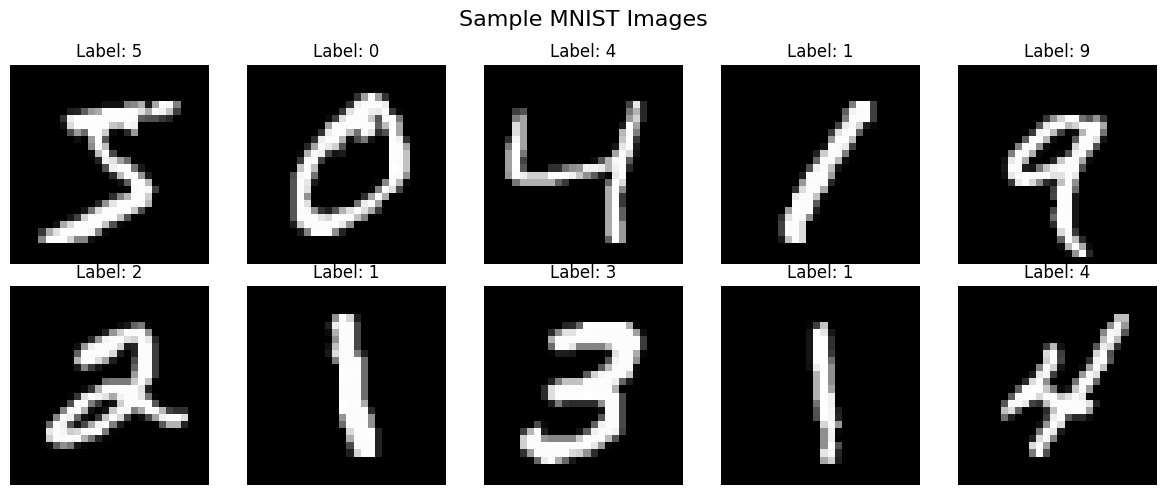

In [11]:
# Några exempelbilder
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Images', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [29]:
# Normalisera pixel värden till [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Flattena bilderna från 28x28 till 784 för att pass ANN input
X_train_flattened = X_train_normalized.reshape(-1, 28*28)
X_test_flattened = X_test_normalized.reshape(-1, 28*28)

# Konvertera labels till one-hot encoding
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(X_train_flattened.shape)
print(X_test_flattened.shape)
print(y_train_categorical.shape)
print(f"\nExempel på one-hot kodad label:")
print(f"Original label: {y_train[0]}")
print(f"One-hot kodad: {y_train_categorical[0]}")

(60000, 784)
(10000, 784)
(60000, 10)

Exempel på one-hot kodad label:
Original label: 5
One-hot kodad: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [33]:
# Bygga en enkel ANN modell
model = keras.Sequential([
    # Input layer 784 features
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden_layer_1'),
    layers.Dense(64, activation='relu', name='hidden_layer_2'),
    layers.Dense(10, activation='softmax', name='output_layer')
])

# Visa modellens arkitektur
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compila modellen
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
# Träna modellen
history = model.fit(
    X_train_flattened, 
    y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0177 - val_accuracy: 0.9760 - val_loss: 0.0889
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0144 - val_accuracy: 0.9767 - val_loss: 0.1024
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9750 - val_loss: 0.1016
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accuracy: 0.9725 - val_loss: 0.1141
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9750 - val_loss: 0.1029
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9969 - loss: 0.0102 - val_accuracy: 0.9751 - val_loss: 0.1119
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9973 - loss: 0.0088 - val_accuracy: 0.9722 - val_loss: 0.1233
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.

In [40]:
# Evaluera på test datan
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_categorical, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Test Loss: 0.1091
Test Accuracy: 0.9774 (97.74%)


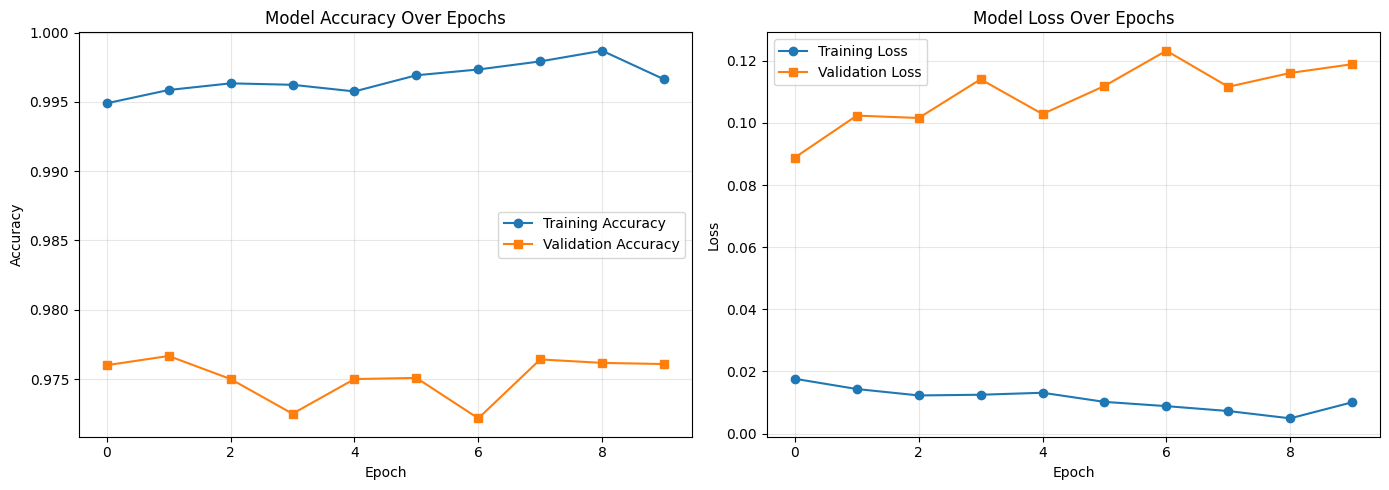

In [42]:
# Plotta träningen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotta accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Accuracy Over Epochs')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plotta loss
ax2.plot(history.history['loss'], label='Training Loss', marker='o')
ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss Over Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


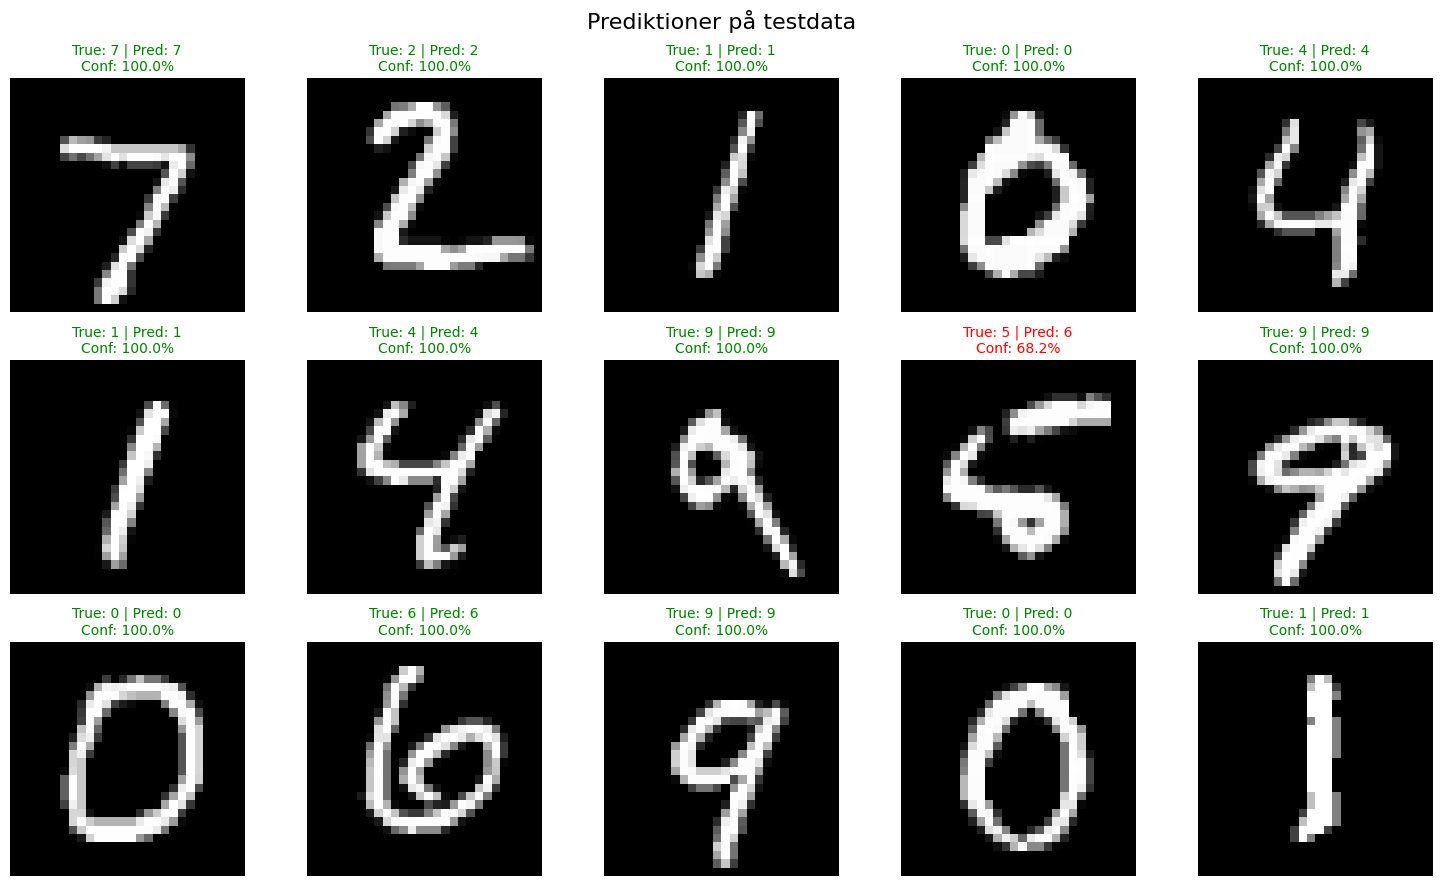

In [47]:
# Prediktera
predictions = model.predict(X_test_flattened)
predicted_classes = np.argmax(predictions, axis=1)

# Visualisera prediktionerna
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Prediktioner på testdata', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], cmap='gray')
    
    true_label = y_test[i]
    pred_label = predicted_classes[i]
    confidence = predictions[i][pred_label] * 100
    
    # Grön = rätt, röd = fel
    color = 'green' if true_label == pred_label else 'red'
    
    ax.set_title(f'True: {true_label} | Pred: {pred_label}\nConf: {confidence:.1f}%', 
                 color=color, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



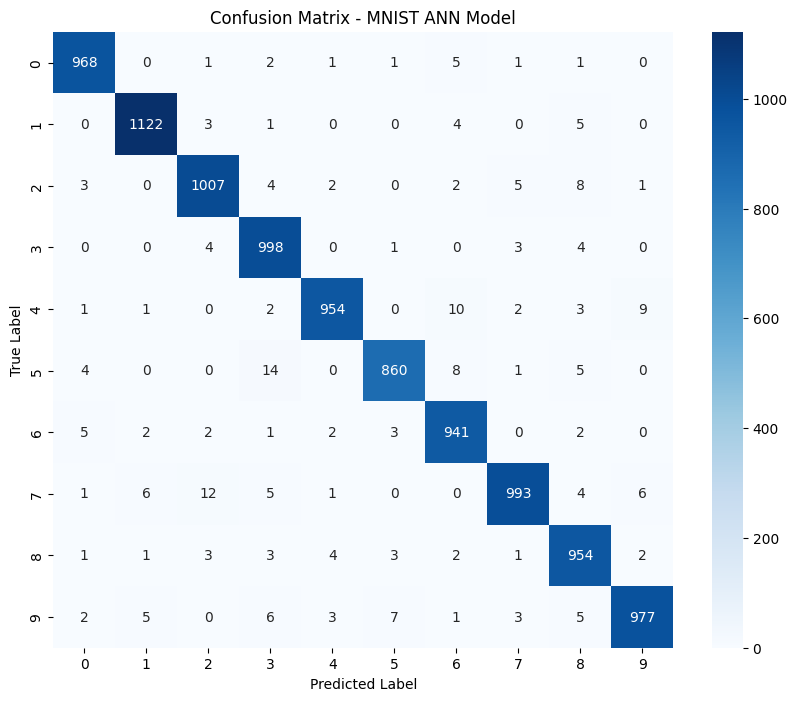

In [57]:
# Classification report
print(classification_report(y_test, predicted_classes))

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MNIST ANN Model')
plt.show()



## ANN-modell resultat: 
  - Input: 784 neuroner (28x28 pixels)
  - Hidden layer 1: 128 neuroner (ReLU)
  - Hidden layer 2: 64 neuroner (ReLU)
  - Output: 10 neuroner (Softmax)

  - Modellen uppnår 97-98% accuracy på testdatan efter 10 epoker.

  - Modellen lär sig snabbt under de första epokerna
  Validation accuracy följer training accuracien, vilket betyder att den inte overfittar